<a href="https://colab.research.google.com/github/RudyHarun99/H8_056/blob/master/06_pytn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA WITH PANDAS

## Data CLeaning with Pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


### Standard Missing Values

In [3]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [4]:
df["ST_NUM"].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

### Non Standard Missing Values

In [5]:
df["NUM_BEDROOMS"]

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [6]:
df["NUM_BEDROOMS"].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [7]:
missing_values = ["n/a", "na", "--"]
df = pd.read_csv(
    "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv",
    na_values = missing_values
    )
df["NUM_BEDROOMS"]

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [8]:
df["NUM_BEDROOMS"].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

### Unexpected Missing Values

In [9]:
df["OWN_OCCUPIED"]

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [10]:
df["OWN_OCCUPIED"].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

Di baris keempat, ada angka 12. Respons untuk Owner Occupied jelas harus berupa string (Y atau N), jadi tipe numerik ini berupa missing value.

Contoh ini sedikit lebih rumit sehingga kita perlu memikirkan strategi untuk mendeteksi jenis nilai yang hilang ini. Ada sejumlah pendekatan berbeda, tetapi inilah cara kita mengatasinya.
- loop pada kolom OWN_OCCUPIED
- kita coba ubah semua entry menjadi integer
- jika entry tidak dapat diubah menjadi integer, tandai sebagai missing value
- jika tidak dapat menjadi integer, maka kita tau kalau entry adlaah string, keep going

In [11]:
cnt = 0
for row in df["OWN_OCCUPIED"]:
  try:
    int(row)
    df.loc[cnt, "OWN_OCCUPIED"] = np.nan
  except ValueError:
    pass
  cnt += 1

In [12]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


Dalam kode di atas, kita loo[ing setiap entri di kolom "Owner Occupied. Untuk mencoba dan mengubah entri menjadi integer, kita menggunakan int(row).

Jika nilai dapat diubah menjadi bilangan bulat, kita mengubah entri menjadi missing value menggunakan np.nan Numpy.

Di sisi lain, jika tidak dapat diubah menjadi bilangan bulat, kita pass dan keep going.

### Summarizing Missing Values

In [13]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [14]:
df.isnull().values.any()

True

In [15]:
df.isnull().sum().sum()

12

### Replacing

Seringkali kita harus memikirkan bagaimana kita menangani missing values.

Terkadang kita hanya ingin menghapus baris tersebut, di lain waktu kita menggantinya.

In [16]:
# Maybe you just want to fill in missinng values with a single value.
df["ST_NUM"].fillna(125, inplace=True)

Kemungkinan besar, kita mungkin ingin melakukan imputasi berbasis lokasi/location based imputation.

In [17]:
df.loc[2, "ST_NUM"] = 125

Cara yang sangat umum untuk mengganti missing values menggunakan median.

In [18]:
median = df["NUM_BEDROOMS"].median()
df["NUM_BEDROOMS"].fillna(median, inplace=True)

In [19]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


## Analyzing Obesity in England

Data diambil dari Data.gov.uk. Kita akan menggunakan file XLS 2014.

In [20]:
%matplotlib inline
# ini proses mengupload file dari local ke google colab
# pake widget
# sumber https://stackoverflow.com/questions/47430544/load-xlsx-file-from-drive-in-colaboratory
import io
from google.colab import files
uploaded = files.upload()

Saving obes.xls to obes.xls


In [21]:
data = pd.ExcelFile("obes.xls")
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

Kita akan fokus pada sheet 7.2. Sekarang jika kita lihat 7.2 di Excel, kita akan melihat bahwa 4 baris teratas dan 14 baris terbawah berisi info yang tidak berguna. Kita hanya membutuhkan baris 5-18.

In [22]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


Baris pertama mewakili column headers. Kita memiliki baris kosong di file asli, dan itu muncul sebagai NaN (bukan angka).

Jadi sekarang kita perlu melakukan dua hal:
- rename the first header to Year, and
- get rid of any empty rows

In [23]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

Di sini kita memberitahu Pandas untuk mengganti kolom Unnamed: 0 menjadi Year menggunakan fungsi rename()

> inplace = True modifies the existing object. Without this, Pandas will create a new object and return that.

Selanjutnya mari kita hapus baris kosonng yang diisi dengan NaN

In [24]:
data_age.dropna(inplace=True)

Ada satu hal lagi yang perlu kita lakukan yang akan membuat hidup kita lebih mudah. Jika kita lihat data_age, nilai pertama adalah angka. Ini adalah indeksnya, dan Pandas menggunakan praktik Excel default yang memiliki angka sebagai indeks. Namun, kita ingin mengubah indeks menjadi Tahun. Ini akan mempermudah pembuatan plot, karena indeks biasanya diplot sebagai sumbu x.

In [25]:
data_age.set_index("Year", inplace=True)
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


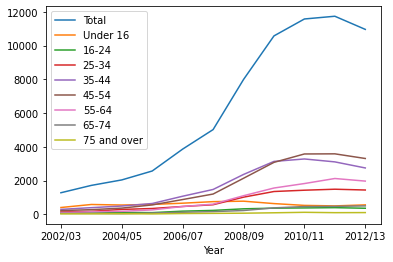

In [26]:
data_age.plot()

Ups. Ada masalah: Data asli kita berisi Total, yang menutupi bidanng lainnya. Kita perlu menyingkirkannya.

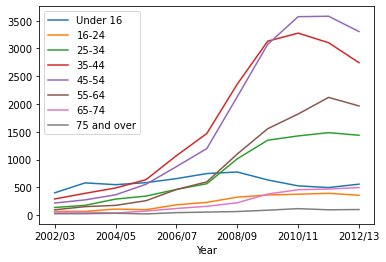

In [27]:
data_age_minus_total = data_age.drop("Total", axis=1)
data_age_minus_total.plot()

Kita benar-benar dapat melihat kelompok usia individu sekarang. Bisakah kita melihat kelompok usia mana yang memiliki obesitas tertinggi?

Kembali ke pertanyaan awal kita: Are children getting fatter?

Mari kita buat plot sebagian kecil data: anak-anak di bawwah usia 16 tahun dan oranng dewasa dengan rentang usia 35-44 tahun.

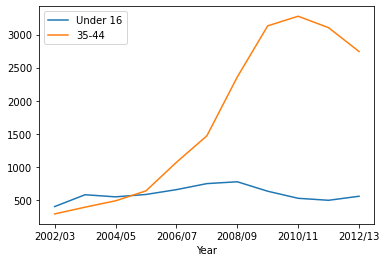

In [29]:
data_age["Under 16"].plot(label="Under 16", legend=True)
data_age["35-44"].plot(label="35-44", legend=True)

So who is getting fatter?

Ketika obesitas anak sedikit menurun, orang tua mereka membengkak. Jadi nampaknya para orang tua lebih perlu mengkhawatirkan diri sendiri daripada anak-anaknya.

### Time Series

Basic Time Series Manipulation

In [30]:
from datetime import datetime

Date range ini memiliki timestamps dengan frekuensi per jam. Jika kita memanggil date_rng kita akan melihat seperti berikut.

In [32]:
date_rng = pd.date_range(start="1/01/2020", end="1/08/2020", freq="H")
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

Mari kita buat contoh data frame dengan timestamp dan lihat 15 elemen pertama:

In [33]:
df = pd.DataFrame(date_rng, columns=["date"])
df["data"] = np.random.randint(0, 100, size=(len(date_rng)))
df.head()

,date,data
0,2020-01-01 00:00:00,59
1,2020-01-01 01:00:00,86
2,2020-01-01 02:00:00,27
3,2020-01-01 03:00:00,72
4,2020-01-01 04:00:00,65


Jika kita ingin melakukan manipulasi deret waktu/time series, kita perlu memiliki date time index sehingga data frame kita diindeks pada timestamp.

Konversikan indeks data frame menjadi datetime index dan tampilkan elemen pertama

In [34]:
df["datetime"] = pd.to_datetime(df["date"])
df = df.set_index("datetime")
df.drop(["date"], axis=1, inplace=True)
df.head()

,data
datetime,
2020-01-01 00:00:00,59
2020-01-01 01:00:00,86
2020-01-01 02:00:00,27
2020-01-01 03:00:00,72
2020-01-01 04:00:00,65


Bagaimana jika 'time' stamps dalam data kita sebenarnya berjenis string vs numerik?

Mari kita ubah date_rng menjadi list of string dan kemudian ubah string tersebut menjadi stempel waktu.

In [36]:
string_date_rng = [str(x) for x in date_rng]
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

Kita dapat mengkonversi string menjadi timestamps dengan melihat formatnya, lalu melihat nilainya

In [37]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

Tetapi bagaimana jika kita perlu mengubah format unique string?

Mari kita buat daftar tanggal yang berubah-ubah menjadi string dan mengubahnya menjadi timestamps

In [38]:
string_date_rng_2 = ["June-01-2020", "June-02-2020", "June-03-2020"]
timestamp_date_rng_2 = [datetime.strptime(x, "%B-%d-%Y") for x in string_date_rng_2]
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

Seperti apa jadinya jika kita memasukkan ini ke dalam data frame?

In [39]:
df2 = pd.DataFrame(timestamp_date_rng_2, columns=["date"])
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


Kembali ke data frame asli kita, mari kita lihat datanya dengan parsing pada timestamp index.

Katakanlah kita hanya ingin melihat data di mana tanggalnya addalah tanggal 2 setiap bulannya, kita bisa menggunakan indeks seperti di bawah ini.

In [40]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,67
2020-01-02 01:00:00,87
2020-01-02 02:00:00,77
2020-01-02 03:00:00,50
2020-01-02 04:00:00,38
2020-01-02 05:00:00,0
2020-01-02 06:00:00,24
2020-01-02 07:00:00,35
2020-01-02 08:00:00,38


Kita juga bisa langsung memanggil tanggal yang ingin kita lihat melalui index dari data frame 

In [41]:
df["2020-01-03"]

,data
datetime,
2020-01-03 00:00:00,64
2020-01-03 01:00:00,36
2020-01-03 02:00:00,72
2020-01-03 03:00:00,38
2020-01-03 04:00:00,19
2020-01-03 05:00:00,4
2020-01-03 06:00:00,47
2020-01-03 07:00:00,0
2020-01-03 08:00:00,92


Bagaimana dengan memilih data di antara tanggal tertentu?

In [42]:
df["2020-01-04":"2020-01-06"]

,data
datetime,
2020-01-04 00:00:00,23
2020-01-04 01:00:00,91
2020-01-04 02:00:00,4
2020-01-04 03:00:00,76
2020-01-04 04:00:00,31
...,...
2020-01-06 19:00:00,52
2020-01-06 20:00:00,93
2020-01-06 21:00:00,94


Basic data frame yang telah kita buat memberi kita data dengan frekuensi per jam, tetapi kita dapat mengambil ualng sampel/resample data pada frekuensi yang berbeda dan menentukan bagaimana kita ingin menghitung summary statistic untuk frekuensi sampel baru.

Kita dapat mengambil min, max, average, sum, dll. Dari data pada frekuensi harian daripada frekuensi per jam seperti contoh di bawah ini, tempat kita menghitung rata-rata harian dai data

In [43]:
df.resample("D").mean()

,data
datetime,
2020-01-01,52.000000
2020-01-02,54.541667
2020-01-03,51.500000
2020-01-04,56.708333
2020-01-05,57.083333
2020-01-06,55.250000
2020-01-07,49.250000
2020-01-08,41.000000


Bagaimana dengan window statistics seperti rolling mean atau rolling sum?

Mari buat kolom baru di df asli kita yang menghitung rolling sum selama periode 3 window dan kemudian lihat di bagian atas data frame

In [44]:
df["rolling_sum"] = df.rolling(3).sum()
df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,59,NaN
2020-01-01 01:00:00,86,NaN
2020-01-01 02:00:00,27,172.0
2020-01-01 03:00:00,72,185.0
2020-01-01 04:00:00,65,164.0


Kita dapat melihat bahwa pandas menghitung dengan benar dan hanya memiliki nilai yang valid ketika ada tiga periode untuk melihat ke belakang

Ini adalah kesempatan bagus untuk melihat bagaimana kita dapat melakukan formward or backfilling data saat bekerja dengan nilai data yang hilang

Berikut df kita, tetapi dengan kolom baru yang mengambil rolling sum dan backfills data

In [46]:
df["rolling_sum_backfilled"] = df["rolling_sum"].fillna(method="backfill")
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,59,NaN,172.0
2020-01-01 01:00:00,86,NaN,172.0
2020-01-01 02:00:00,27,172.0,172.0
2020-01-01 03:00:00,72,185.0,185.0
2020-01-01 04:00:00,65,164.0,164.0


## Time Series on Dataset

In [47]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [48]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [49]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


Karena kolom Date adalah tipe data yang benar, mari kita set sebagai indeks DataFrame

In [50]:
opsd_daily = opsd_daily.set_index("Date")
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [51]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

Alternatifnya, kita bisa menggabungkan langkah-langkah di atas menjadi satu baris, menggunakan parameter index_col dan parse _dates dari fungsi read_csv(). Ini seringkali merupakan jalan pintas yang berguna.

In [52]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',
                         index_col=0, parse_dates=True)
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


Aspek berguna lainnya dari DatetimeIndex adalah bahwa setiap komponen tanggal / waktu tersedia sebagai atribut seperti tahun, bulan, hari, dan seterusnya. Mari tambahkan beberapa kolom lagi ke opsd_daily, yang berisi tahun, bulan, dan hari kerja.

In [53]:
opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily["Weekday"] = opsd_daily.index.weekday
opsd_daily.head

<bound method NDFrame.head of             Consumption     Wind   Solar  Wind+Solar  Year  Month  Weekday
Date                                                                      
2006-01-01   1069.18400      NaN     NaN         NaN  2006      1        6
2006-01-02   1380.52100      NaN     NaN         NaN  2006      1        0
2006-01-03   1442.53300      NaN     NaN         NaN  2006      1        1
2006-01-04   1457.21700      NaN     NaN         NaN  2006      1        2
2006-01-05   1477.13100      NaN     NaN         NaN  2006      1        3
...                 ...      ...     ...         ...   ...    ...      ...
2017-12-27   1263.94091  394.507  16.530     411.037  2017     12        2
2017-12-28   1299.86398  506.424  14.162     520.586  2017     12        3
2017-12-29   1295.08753  584.277  29.854     614.131  2017     12        4
2017-12-30   1215.44897  721.247   7.467     728.714  2017     12        5
2017-12-31   1107.11488  721.176  19.980     741.156  2017     12     

Kita dapat memilih data untuk satu hari menggunakan string seperti '2017-08-10'

In [54]:
opsd_daily.loc["2017-08-10"]

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

Kita juga dapat memilih slice dari hari, seperti "2014-01-20":"2014-01-22". Seperti pengindeksan berbasis label biasa dengan loc, slice tersebut menyertakan kedua titik akhir.

In [55]:
opsd_daily.loc["2014-01-20":"2014-01-22"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


Fitur lain yang sangat berguna dari time series pandas adalah partial-string indexing, di mana kita dapat memilih semua tanggal/ waktu yang sebagian cocok dengan string yang diberikan. Misalnya, kita dapat memilih seluruh tahun 2006 dengan **opsd_daily.loc["2006"]**, atau seluruh bulan Februari dengan **opsd_daily.loc["2012-02"]**

In [56]:
opsd_daily.loc["2012-02"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


Kita dapat dengan mudah memvisualisasikan data time series kita. Di bagian ini, kita akan membahas beberapa contoh dan beberapa penyesuaian yang berguna untuk plot time series.

Mari kita buat line plot dari time series konsumsi listrik harian di jerman, menggunakan method **plot()** DataFrame

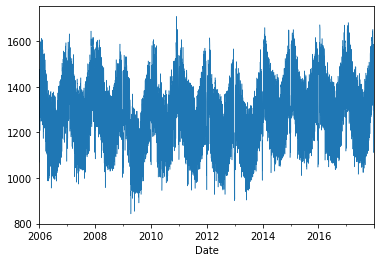

In [57]:
opsd_daily["Consumption"].plot(linewidth=0.5)

Kita dapat melihat bahwa method plot() memilih lokasi trick yang cukup bagus (setiap dua tahun) dan label (years) untuk sumbu x, yang sangat membantu. Namun, dengan banyaknya titik data, line plot menjaddi padat dan sulit untuk dibaca.

Mari kita plot data sebagai titik-titik, dan lihat juga time series dari Matahari dan Angin.

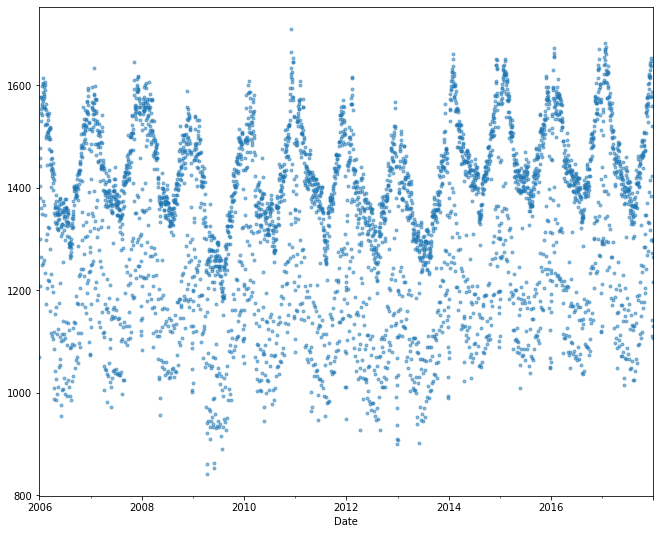

In [58]:
opsd_daily["Consumption"].plot(marker=".", alpha=0.5, linestyle="None", figsize=(11, 9))

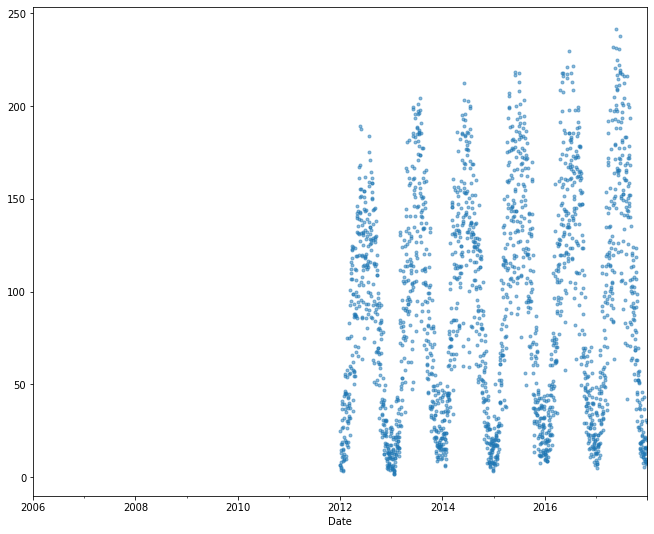

In [59]:
opsd_daily["Solar"].plot(marker=".", alpha=0.5, linestyle="None", figsize=(11, 9))

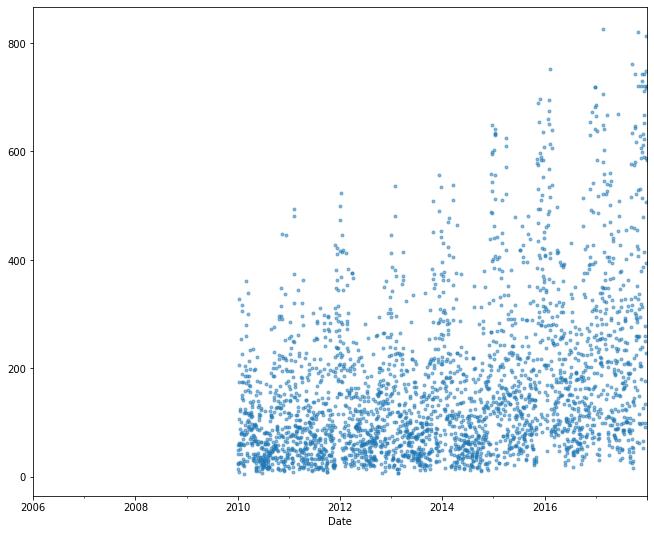

In [60]:
opsd_daily["Wind"].plot(marker=".", alpha=0.5, linestyle="None", figsize=(11, 9))

Kita sudah bisa melihat beberapa pola menarik yang muncul :
- konsumsi listrik tertinggi ada di musim dingin, kemungkinan karena pemanas listrik dan peningkatan penggunaan penerangan, dan terendah di musim panas
- produksi tenaga surya paling tinggi di musim panas, saat sinar matahari paling melimpah, dan paling rendah di musim dingin
- produksi tenaga angin paling tinggi di musim dingin, mungkin karena angin yang lebih kuat dan badai yanng lebih sering, dan paling rendah di musim panas
- tampaknya ada tren peningkatan yang kuat dalam produksi tenaga angin selama bertahun-tahun

Ketiga time series dengan jelas menunjukkan perioditas -- sering disebut sebagai seasonality dalam time series analysis -- di mana sebuah pola berulang kalli pada interval waktu yang teratur. Rangkaian waktu Consumption, Solar, dan Wind berosilasi antara nilai tinggi dan rendah dalam skala waktu tahunan, sesuai dengan perubahan cucau musiman sepanjang tahun. Namun, musim secara umum tidak harus sesuai dengan musim meteorologi. Misalnya, data penjualan ritel sering kali menunjukkan musim tahunan dengan peningkatan penjualan pada bulan November dan Desember, menjelang liburan.

Seasonality juga dapat terjadi pada skala waktu lain. Plot di atas menunjukkan bahwa konsumsi listrik Jerman mungkin terlihat weekly seasonality, sesuai dengan hari kerja dan akhir pekan. Mari kita plot deret waktu dalam satu tahun untuk menyelidiki lebih lanjut.

Text(0, 0.5, 'daily Consumption (GWh)')

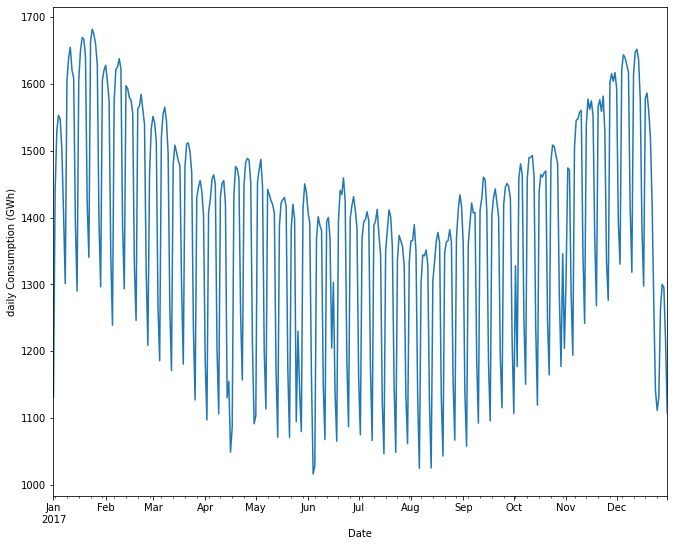

In [61]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))
ax.set_ylabel('daily Consumption (GWh)')

Sekarang kita adapat dengan jelas melihat osilasi mingguan/weekly oscillations. Ciri menarik lain yang terlihat pada tingkat granularitas ini adalah penurunan drastis konsumsi listrik pada awal Januari dan akhir Desember, selama liburan.

Mari kita perbesar lebih jauh dan lihat bulan Januari dan Februari saja.

Text(0, 0.5, 'daily Consumption (GWh)')

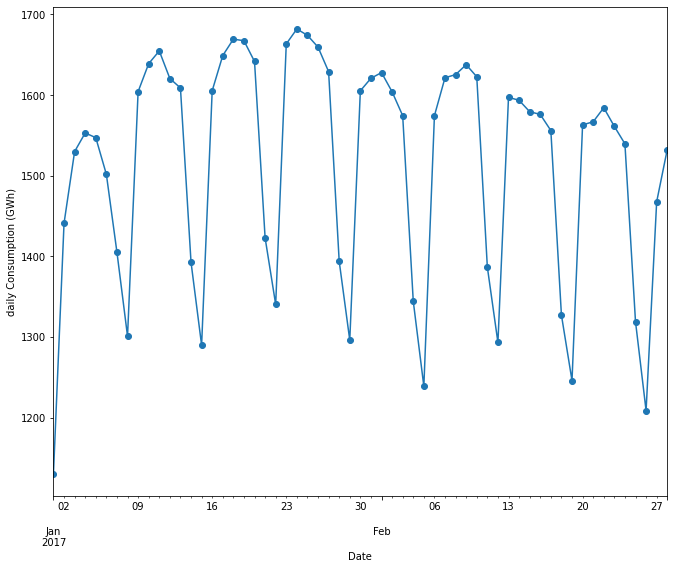

In [62]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11, 9))
ax.set_ylabel('daily Consumption (GWh)')

Selanjutnya, mari kita jelajahi lebih jauh seasonality data kita dengan fungsi box plots untuk menglompokkan data berdasarkan periode waktu yang berbeda dan menampilkan distribusi untuk setiap kelompok. Pertama-tama, kita akan mengelompokkan data brdasarkan bulan, untuk memvisualisasikan yearly seasonality.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


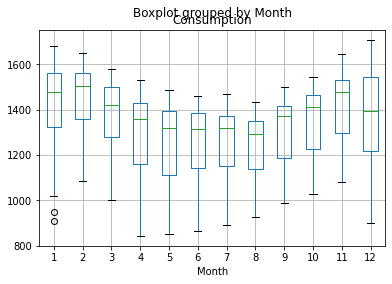

In [63]:
opsd_daily.boxplot(column=['Consumption'], by='Month')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


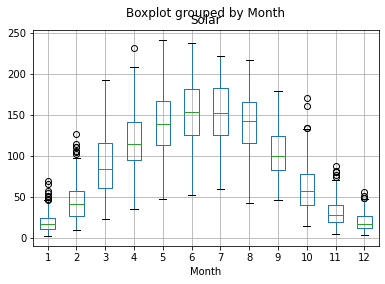

In [64]:
opsd_daily.boxplot(column=['Solar'], by='Month')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


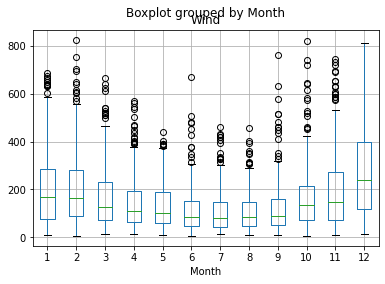

In [65]:
opsd_daily.boxplot(column=['Wind'], by='Month')

box plots berikut mengkonfirmasi yearly seasonality yang kita lihat di plot sebelumnya dan memberikan beberapa insights :
- meskipun konsumsi listrik umumnya lebih tinggi di musim dingin dan lebih besar di musim panas, median dan dua kuartil lebih rendah pada bulan Desember dan Januari dibandingkan dengan November dan Februari, kemungkinan karena bisnis tutup selama liburan. Kita melihat ini dalam rangkaiann waktu untuk tahun 2017, dan boz plot menegaskan bahwa ini adalah pola yang konsisten selama bertahun-tahun
- sementara produksi tenaga surya dan angin sama-sama menunjukkan yearly seasonality, distribusi tenaga angin memiliki lebih banyak outliers, yang mencerminkan efek kecepatan angin ekstrem sesekali yang terkait dengan badai dan kondisi cuaca semenetara lainnya

Selanjutnya, mari kelompokkan rangkaian waktu konsumsi listrik berdasarkan hari dalam seminggu, untuk menjelajahi weekly seasonality

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


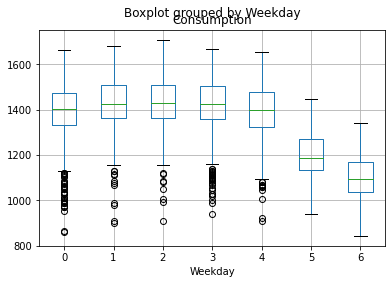

In [67]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

Seperti yang diharapkan, konsumsi listrik secara signifikan lebih tinggi pada hari kerja dibandingkan pada akhir pekan, Outliers rendah pada hari kerja mungkin selama hari libur/holidays.

Seringkali berguna untuk resample data time series kita ke frekuensi yang lebih rendah atau lebih tinggi. Resampling ke frekuensi yang lebih rendah (downsampling) biasanya melibatkan operasi agregasi - misalnya, menghitung total penjualan bulanan dari data harian. Resampling ke frekuensi yang lebih tinggi (upsampling) kurang umum dan seringkali melibatkan interpolasi atau metode pengisian data lainnya - misalnya, menginterpolasi data cuaca setiap jam hingga interval 10 menit untuk dimasukkan ke model ilmiah.

Kita akan fokus di sini pada downsampling, mengeksplorasi bagaimana hal itu dapat membantu kita menganalisa data OPSD dalam berbagai skala waktu. Kita menggunakan method **resample()** DataFrame, yang membagi DatetimeIndex ke dalam time bins dan mengelompokkan data menurut time bin. Metode **resample()** mengembalikan objek Resampler, mirip dengan objek GroupBy Pandas. Kita kemudia dapat menerapkan metode agregasi seperti **mean(), median(), sum()**, dll., ke grup data untuk setiap time bin.

Misalnya, mari kita resample data menjadi weekly mean time series.

In [68]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


Baris pertama di atas, berlabel 2006-01-01, berisi rata-rata dari semua data yang ada dalam time bin 2006-01-01. Baris kedua, berlabel 2006-01-08, berisi data rata-rata untuk time bin 2006-01-08 hingga 2006-01-14, dan seterusnya.

Berdasarkan konstruksi, deret waktu mingguan kita memiliki 1/7 poin data sebanyak deret waktu harian. Kita dapat mengkonfirmasi ini dengan membandingkan jumlah baris dari dua DataFrame.

In [69]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


Mari kita gambarkan rangkaian waktu Solar harian dan mingguan dalam satu periode enam bulan untuk membandingkannya

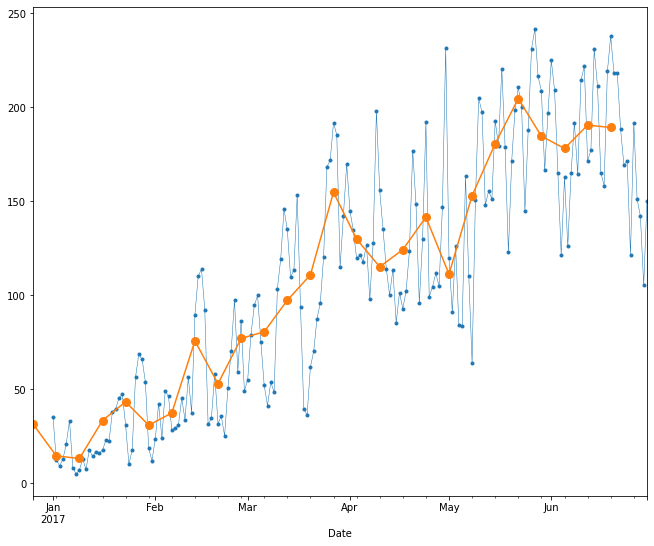

In [70]:
start, end = '2017-01', '2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))

Kita dapat melihat bahwa deret waktu rata-rata mingguan lebih halus daripada deret waktu harian karena variabilitas frekuensi yang lebih tinggi telah dirata-ratakan dalam resampling